# Genertors and Random Numbers
This is our week 4 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [27]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

## Examples: generator expressions

In [28]:
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)
# We can turn a generator into a list to look at all its elements (though this somewhat defeats the purpose!)
print(list(neighbours))
# Once the "stream" has flowed past, it is empty - there is no way to "replenish" it.
print(list(neighbours))


<generator object <genexpr> at 0x11eb7a190>
[(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


## Pseudo-Random Numbers

In [29]:
# A list of n random numbers - again we are turning a "generator" in to a list
n = 10
[random.random() for i in range(n)]

[0.2449091461165508,
 0.4835368869150072,
 0.6800374583186103,
 0.948131208285413,
 0.46314633681841855,
 0.09776611049739581,
 0.48321127589170065,
 0.8783267455290993,
 0.5691622812157079,
 0.07909425999457231]

<AxesSubplot:>

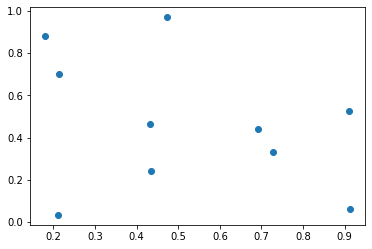

In [37]:
# Scatter plot of random (x,y) coordinates
n = 20
fig, ax = plt.subplots()
ax.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
ax

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [30]:
import time

class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milli-seconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[40, 4, 28, 58, 61, 13, 22, 16, 43, 25, 37, 52, 19, 64, 34, 31, 10, 1, 7, 49]

Sequence seed: 52


<AxesSubplot:>

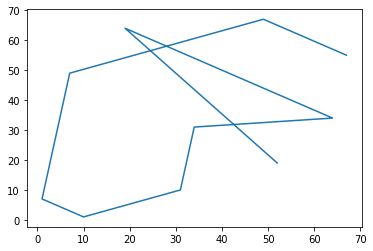

In [46]:
# Scatter plot of (seed, rand(seed))
fig, ax = plt.subplots()
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]
ax.plot([x for x,y in pairs], [y for x,y in pairs])
ax

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [31]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

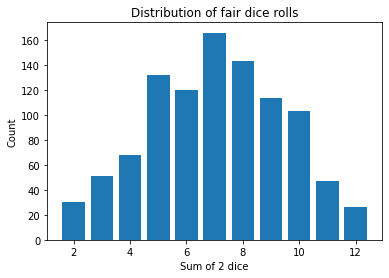

In [32]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()